# Check distributions used in undelayed-demand




## Set up the notebook environment

In [1]:
# Reload functions every time
%load_ext autoreload 
%autoreload 2

## Set file paths

In [1]:
from patientflow.load import set_file_paths
from patientflow.load import load_config_file
from pathlib import Path


# set file locations
data_folder_name = 'data-raw' 
project_root = Path.cwd().parent 

# set file paths
data_file_path, media_file_path, model_file_path, config_path = set_file_paths(project_root, 
               data_folder_name=data_folder_name, config_file='config-uclh.yaml')

# create subfolders for weekdays and weekends
media_file_path_weekdays = media_file_path / 'undelayed-demand-uclh' / 'weekdays'
media_file_path_weekends = media_file_path / 'undelayed-demand-uclh' / 'weekends'
media_file_path_all_days = media_file_path / 'undelayed-demand-uclh' / 'all_days'

    
media_file_path_weekdays.mkdir(parents=True, exist_ok=True)
media_file_path_weekends.mkdir(parents=True, exist_ok=True)
media_file_path_all_days.mkdir(parents=True, exist_ok=True)

Configuration will be loaded from: /home/jovyan/work/undelayed-demand/config-uclh.yaml
Data files will be loaded from: /home/jovyan/work/undelayed-demand/data-raw
Trained models will be saved to: /home/jovyan/work/undelayed-demand/trained-models/raw
Images will be saved to: /home/jovyan/work/undelayed-demand/trained-models/raw/media


## Load parameters

These are set in config.json. 

In [2]:
# Set params for aspirational curve
x1 = 4
y1 = 0.8
x2 = 12
y2 = 0.99 

print(f'The aspiration is for {y1*100}% of patients to be admitted within {x1} hours, and {y2*100}% of patients to be admitted within {x2} hours')

The aspiration is for 80.0% of patients to be admitted within 4 hours, and 99.0% of patients to be admitted within 12 hours


## Load data

Here we load the data. NOTE - the public data is a subset of UCLH arrivals, so the charts here will underestimate the demand at UCLH. 

In [6]:
import pandas as pd
inpatient_arrivals = pd.read_csv(data_file_path / 'ed_sdec_ct_5.csv')
inpatient_arrivals['arrival_datetime'] = pd.to_datetime(inpatient_arrivals['arrival_datetime'])

inpatient_arrivals.set_index('arrival_datetime', inplace=True)

# select only data from 2023 onwards
# inpatient_arrivals = inpatient_arrivals[inpatient_arrivals.index > '2023-01-01']

weekdays = inpatient_arrivals[(inpatient_arrivals.index.weekday < 5) ]
weekends = inpatient_arrivals[(inpatient_arrivals.index.weekday >= 5) ]

/tmp/ipykernel_3061/985067842.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  inpatient_arrivals['arrival_datetime'] = pd.to_datetime(inpatient_arrivals['arrival_datetime'])


In [7]:
inpatient_arrivals

,HospitalProviderSpellNumber,AdmissionType,is_child,Sex,arrival_day,IsED_Flag,IsSDEC_Flag,IsEDAndSDEC_Flag,SDEC_In_Datetime,Ward_In_Datetime,...,WardCode,SourcePatientService,SourceReportUnit,SourceDivision,DestinationPatientService,DestinationReportUnit,DestinationDivision,RequestedInstant,SourceWard,DestWard
arrival_datetime,,,,,,,,,,,,,,,,,,,,,
2019-03-31 03:49:00,1010666217,"Emergency Admission - A&E, Casualty, or Dental...",False,M,Sunday,1,0,0,NaN,31/03/2019 11:24,...,UCH T01 AMU,Accident & Emergency,Accident & Emergency,Emergency Services,Acute Medicine,Acute Medicine,Emergency Services,31/03/2019 07:24,UCH ED,UCH T01 AMU
2019-03-31 03:57:00,1010666447,*Unspecified,False,F,Sunday,1,0,0,NaN,31/03/2019 06:55,...,UCH T01 AMU,Accident & Emergency,Accident & Emergency,Emergency Services,Acute Medicine,Acute Medicine,Emergency Services,31/03/2019 06:21,UCH ED,UCH T01 AMU
2019-03-31 04:06:00,1010666448,"Emergency Admission - A&E, Casualty, or Dental...",False,F,Sunday,1,0,0,NaN,31/03/2019 16:25,...,UCH T00 EAU,Accident & Emergency,Accident & Emergency,Emergency Services,Acute Medicine,Acute Medicine,Emergency Services,31/03/2019 14:55,UCH ED,UCH T00 EAU
2019-03-31 04:41:00,1010666462,"Emergency Admission - A&E, Casualty, or Dental...",False,M,Sunday,1,0,0,NaN,31/03/2019 10:52,...,UCH T09S,Accident & Emergency,Accident & Emergency,Emergency Services,Accident & Emergency,Accident & Emergency,Emergency Services,31/03/2019 05:48,UCH ED,UCH T09S
2019-03-31 04:48:00,1010666470,"Emergency Admission - A&E, Casualty, or Dental...",False,F,Sunday,1,0,0,NaN,31/03/2019 08:36,...,UCH T01 AMU,Accident & Emergency,Accident & Emergency,Emergency Services,Accident & Emergency,Accident & Emergency,Emergency Services,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25 17:03:00,1060678191,Elective Admission - Planned,False,M,Tuesday,1,0,0,NaN,25/03/2025 11:14,...,MCC CHEMO,Haematology - Myeloma,Haematology,Cancer Services,Haematology - Myeloma,Haematology,Cancer Services,25/03/2025 18:30,UCH ED,UCH T16N
2025-03-25 17:58:00,1061086699,"Emergency Admission - A&E, Casualty, or Dental...",True,M,Tuesday,1,0,0,NaN,25/03/2025 20:24,...,UCH T11S,Accident & Emergency,Accident & Emergency,Emergency Services,Paediatric - General,General Paediatrics,Children and Young People,25/03/2025 19:03,UCH ED,UCH T11S
2025-03-25 18:54:00,1061048327,Elective Admission - Planned,False,F,Tuesday,1,0,0,NaN,25/03/2025 14:19,...,MCC ON SUP,Accident & Emergency,Accident & Emergency,Emergency Services,Haematology - Diagnostic,Haematology,Cancer Services,NaN,NaN,NaN



Whole dataset
Mean: 49.1856
Variance: 162.1403
Variance-to-Mean Ratio: 3.2965


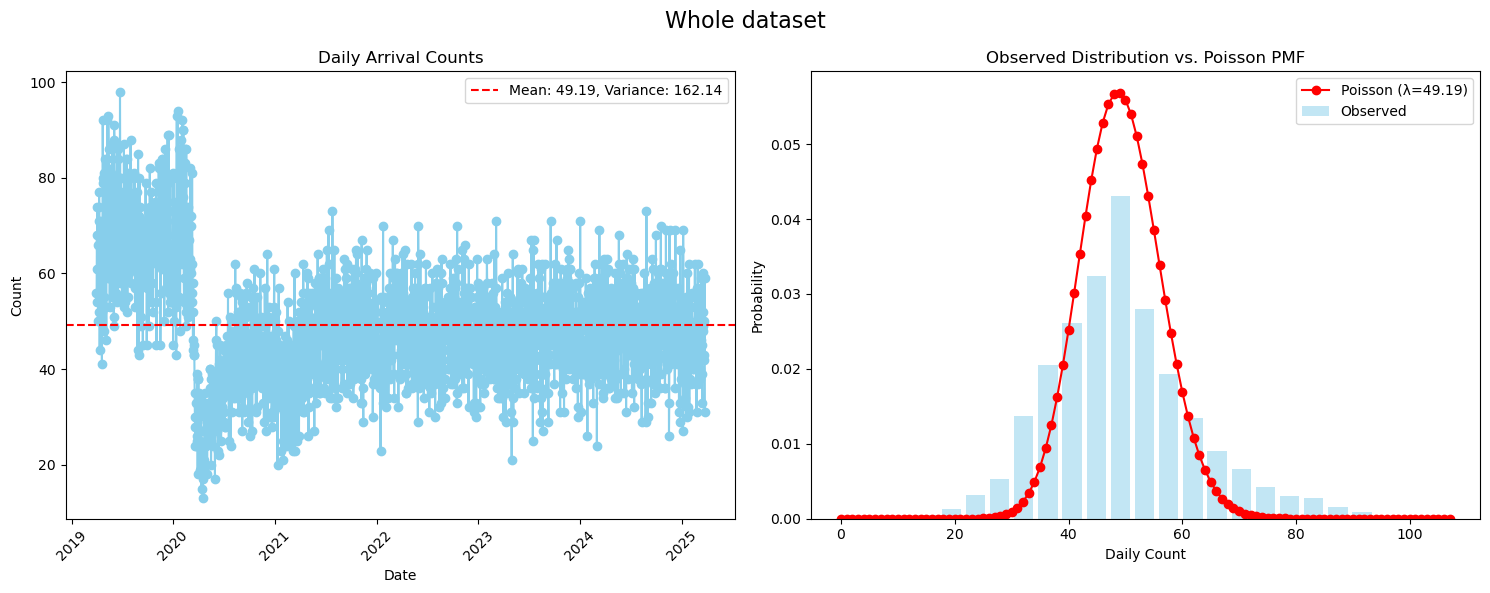


Weekdays
Mean: 52.1690
Variance: 153.0348
Variance-to-Mean Ratio: 2.9334


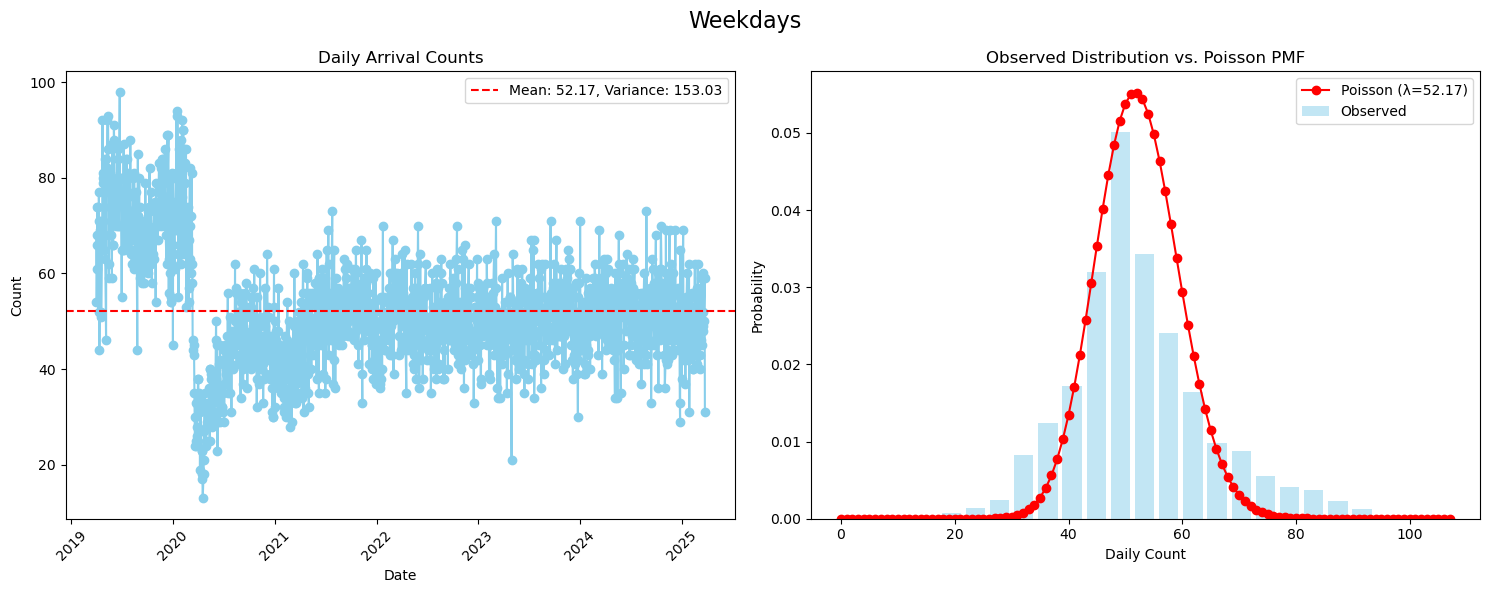


Weekends
Mean: 41.7296
Variance: 107.2168
Variance-to-Mean Ratio: 2.5693


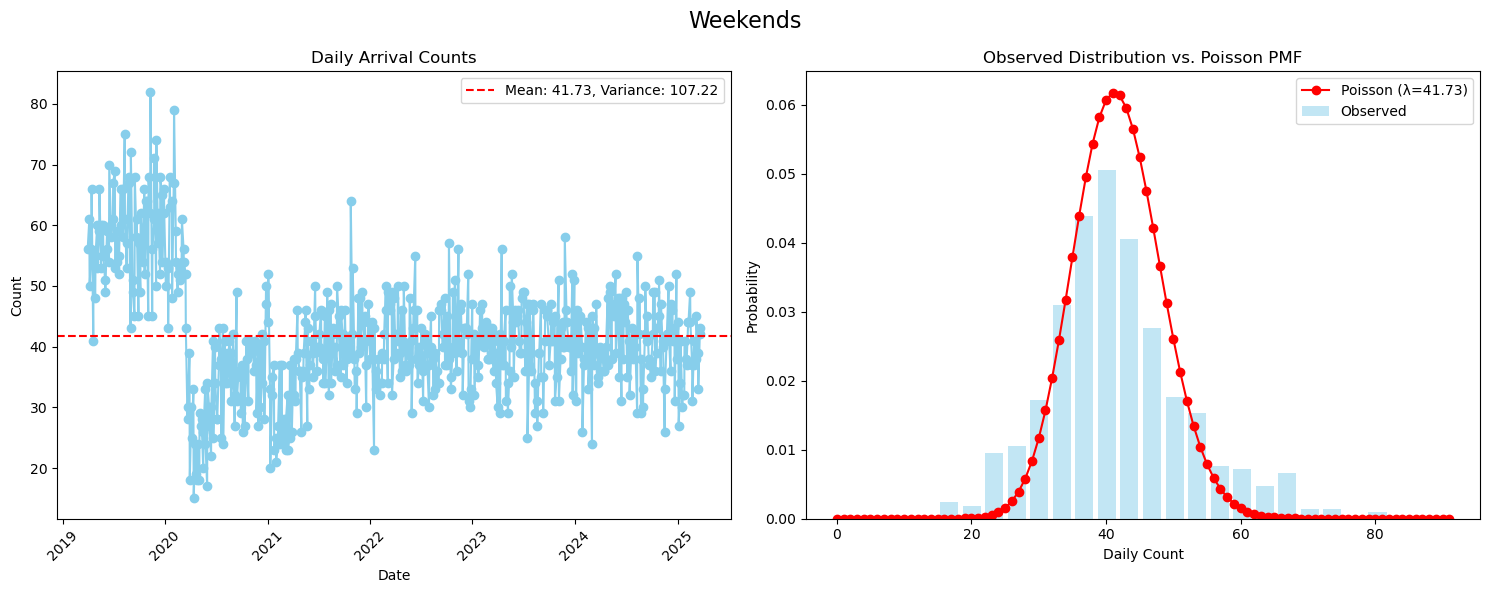

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def compare_with_poisson(df, suptitle):

    print(f"\n{suptitle}")

    df = df.copy(deep=True).reset_index()

    # After calculating the daily counts
    daily_counts = df.groupby(df['arrival_datetime'].dt.date).size()
    daily_counts_df = daily_counts.reset_index(name='count')
    
    # Calculate mean and variance
    mean_count = daily_counts_df['count'].mean()
    variance_count = daily_counts_df['count'].var()
    
    # Print the comparison
    print(f"Mean: {mean_count:.4f}")
    print(f"Variance: {variance_count:.4f}")
    print(f"Variance-to-Mean Ratio: {variance_count/mean_count:.4f}")
    
    
    
    # Generate Poisson PMF based on the mean
    max_count = daily_counts_df['count'].max()
    count_range = np.arange(0, max_count + 10)
    poisson_pmf = stats.poisson.pmf(k=count_range, mu=mean_count)
    
    # Create the plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(suptitle, fontsize=16)

    
    # Plot 1: Daily counts over time
    ax1.plot(daily_counts_df['arrival_datetime'], daily_counts_df['count'], 'o-', color='skyblue')
    ax1.axhline(mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}, Variance: {variance_count:.2f}')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Count')
    ax1.set_title('Daily Arrival Counts')
    ax1.legend()
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    # Plot 2: Comparison with Poisson distribution
    # Histogram of observed counts
    n_bins = min(20, max_count + 1)  # Adjust number of bins based on max count
    observed_hist, bins = np.histogram(daily_counts_df['count'], bins=n_bins, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    ax2.bar(bin_centers, observed_hist, width=(bins[1]-bins[0])*0.8, alpha=0.5, color='skyblue', label='Observed')
    ax2.plot(count_range, poisson_pmf, 'ro-', label=f'Poisson (λ={mean_count:.2f})')
    ax2.set_xlabel('Daily Count')
    ax2.set_ylabel('Probability')
    ax2.set_title('Observed Distribution vs. Poisson PMF')
    ax2.legend()

    plt.tight_layout()
    plt.show()


compare_with_poisson(inpatient_arrivals, "Whole dataset")
compare_with_poisson(weekdays, "Weekdays")
compare_with_poisson(weekends, "Weekends")